# Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from ipynb.fs.defs.functions_pca import *
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('products.csv', index_col=[0])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983469 entries, 0 to 1555489
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             983469 non-null  object 
 1   brands_tags              569374 non-null  object 
 2   main_category            541351 non-null  object 
 3   ingredients_text         476634 non-null  object 
 4   labels_tags              244369 non-null  object 
 5   countries_tags           982170 non-null  object 
 6   energy_100g              983469 non-null  float64
 7   fat_100g                 983469 non-null  float64
 8   proteins_100g            983469 non-null  float64
 9   carbohydrates_100g       983469 non-null  float64
 10  nutrition-score-fr_100g  521186 non-null  float64
 11  sodium_100g              983469 non-null  float64
 12  sugars_100g              983469 non-null  float64
 13  saturated-fat_100g       983469 non-null  float64
dtypes: 

In [4]:
df.head()

,product_name,brands_tags,main_category,ingredients_text,labels_tags,countries_tags,energy_100g,fat_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,sodium_100g,sugars_100g,saturated-fat_100g
0,Vitória crackers,NaN,NaN,NaN,NaN,france,1583.3,7.0,7.8,70.1,NaN,0.560,15.0,3.08
3,moutarde au moût de raisin,courte-paille,en:mustards,eau graines de téguments de moutarde vinaigre ...,fr:delois-france,france,883.1,8.2,5.1,29.0,18.0,1.840,22.0,2.20
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,france,85.0,0.0,0.2,4.8,NaN,0.816,0.4,0.00
6,Mini coco,NaN,NaN,NaN,NaN,france,315.0,3.0,2.0,10.0,NaN,0.460,3.0,1.00
13,Salade de carottes râpées,NaN,en:seasoned-shredded-carrots,NaN,NaN,france,116.5,0.3,0.9,5.3,1.0,0.168,3.9,0.10


In [5]:
df['grade'] = pd.cut(df['nutrition-score-fr_100g'], bins=[-16,-2, 3, 11, 16, 40], labels=['A', 'B', 'C', 'D', 'E'])

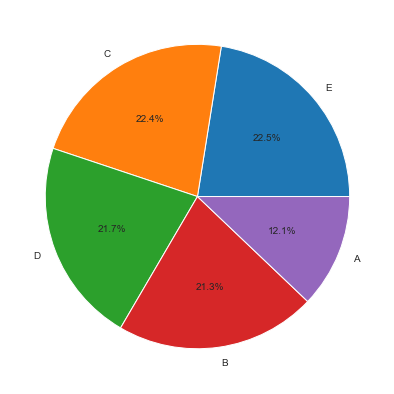

In [6]:
fig,ax = plt.subplots()
fig.set_size_inches((7,7))

a = df.grade.value_counts()

plt.pie(a, labels=a.index, autopct='%1.1f%%')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983469 entries, 0 to 1555489
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   product_name             983469 non-null  object  
 1   brands_tags              569374 non-null  object  
 2   main_category            541351 non-null  object  
 3   ingredients_text         476634 non-null  object  
 4   labels_tags              244369 non-null  object  
 5   countries_tags           982170 non-null  object  
 6   energy_100g              983469 non-null  float64 
 7   fat_100g                 983469 non-null  float64 
 8   proteins_100g            983469 non-null  float64 
 9   carbohydrates_100g       983469 non-null  float64 
 10  nutrition-score-fr_100g  521186 non-null  float64 
 11  sodium_100g              983469 non-null  float64 
 12  sugars_100g              983469 non-null  float64 
 13  saturated-fat_100g       983469 non-null  f

In [8]:
df.describe()

,energy_100g,fat_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,sodium_100g,sugars_100g,saturated-fat_100g
count,983469.000000,983469.000000,983469.000000,983469.000000,521186.000000,983469.000000,983469.000000,983469.000000
mean,1132.884891,13.325382,8.769128,28.868857,9.182681,0.513493,13.406208,4.994748
std,739.729768,15.650092,9.675470,27.628341,8.880119,1.821994,19.173428,7.259664
min,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000
25%,465.000000,1.040000,2.000000,4.100000,2.000000,0.040000,0.800000,0.100000
50%,1103.160000,7.690000,6.200000,17.100000,10.000000,0.240000,3.800000,1.900000
75%,1674.870000,21.430000,12.280702,53.570000,16.000000,0.558000,19.440000,7.100000
max,3700.000000,100.000000,100.000000,100.000000,40.000000,100.000000,100.000000,100.000000


## Analyse Univariée

### Numériques

In [9]:
df.describe().columns

Index(['energy_100g', 'fat_100g', 'proteins_100g', 'carbohydrates_100g',
       'nutrition-score-fr_100g', 'sodium_100g', 'sugars_100g',
       'saturated-fat_100g'],
      dtype='object')

In [10]:
num_var = df.describe().columns

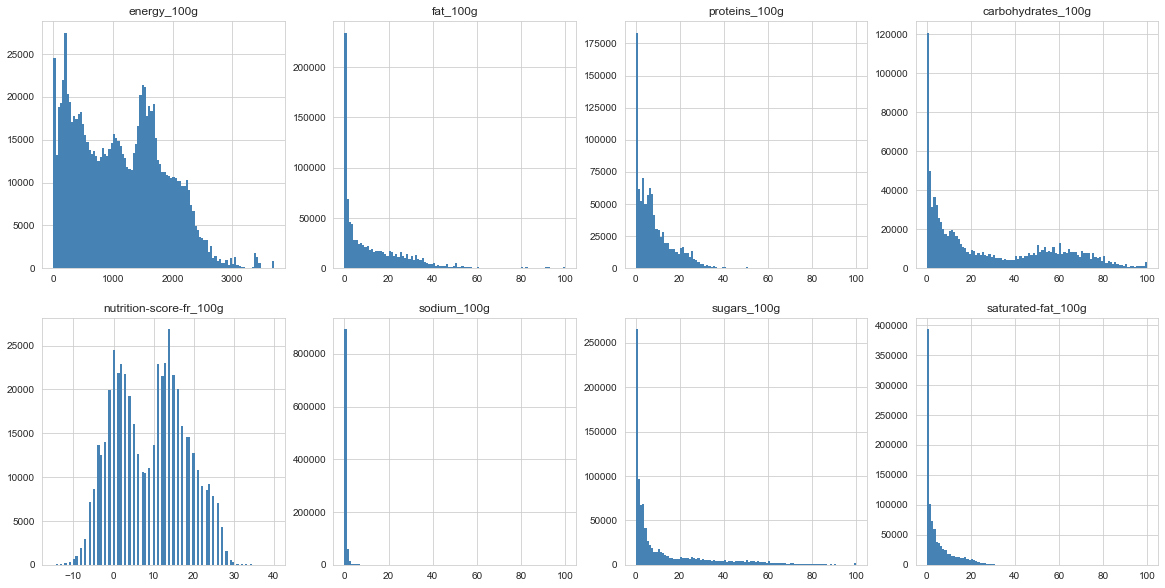

In [11]:
X = df[num_var]
fig = plt.figure(figsize=(20,10))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(2,4, (feat_idx+1))
    h = ax.hist(X.iloc[:, feat_idx], bins=100, color='steelblue', edgecolor='none')
    ax.set_title(X.columns[feat_idx])

<AxesSubplot:xlabel='energy_100g', ylabel='Count'>

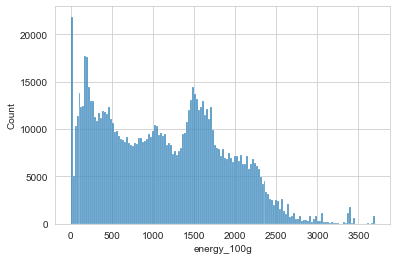

In [12]:
sns.histplot(data=df, x='energy_100g')

In [13]:
X_log = X[[ 'fat_100g', 'proteins_100g', 'carbohydrates_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g']] +1
X_log = np.log(X_log)


In [14]:
X_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983469 entries, 0 to 1555489
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fat_100g            983469 non-null  float64
 1   proteins_100g       983469 non-null  float64
 2   carbohydrates_100g  983469 non-null  float64
 3   sodium_100g         983469 non-null  float64
 4   sugars_100g         983469 non-null  float64
 5   saturated-fat_100g  983469 non-null  float64
dtypes: float64(6)
memory usage: 52.5 MB


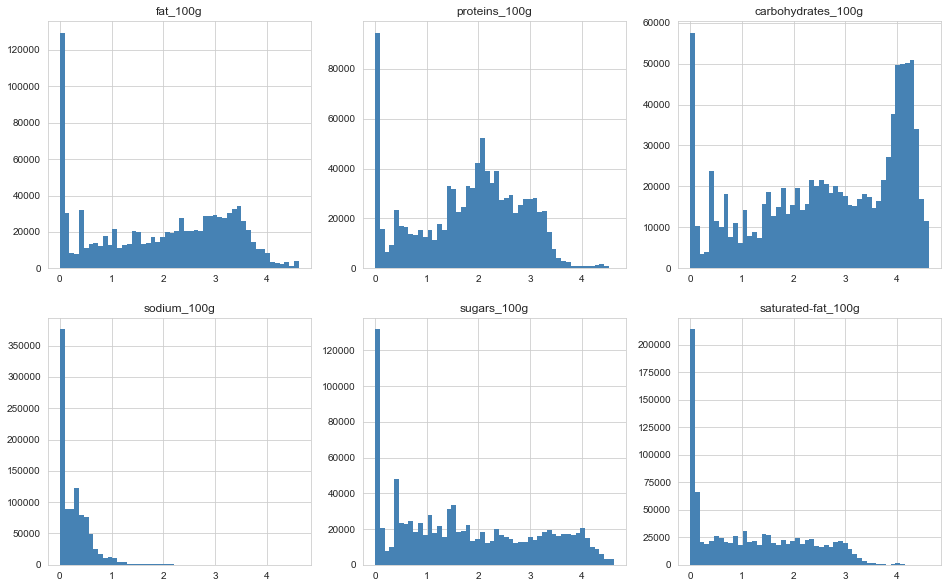

In [15]:
fig = plt.figure(figsize=(16,10))
for feat_idx in range(X_log.shape[1]):
    ax = fig.add_subplot(2,3, (feat_idx+1))
    h = ax.hist(X_log.iloc[:, feat_idx], bins=50, color='steelblue', edgecolor='none')
    ax.set_title(X_log.columns[feat_idx])

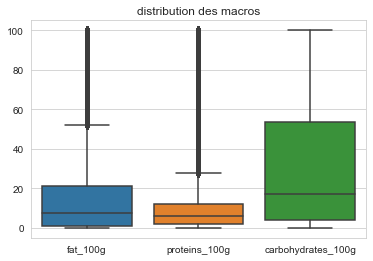

In [16]:
macro = ['fat_100g', 'proteins_100g',
       'carbohydrates_100g']
sns.boxplot(data=df[macro])
plt.title('distribution des macros')
plt.show()

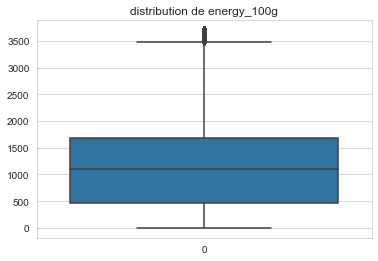

In [17]:
sns.boxplot(data=df.energy_100g)
plt.title('distribution de energy_100g')
plt.show()

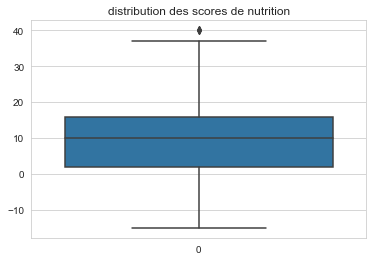

In [18]:
sns.boxplot(data=df['nutrition-score-fr_100g'])
plt.title('distribution des scores de nutrition')
plt.show()

<AxesSubplot:ylabel='countries_tags'>

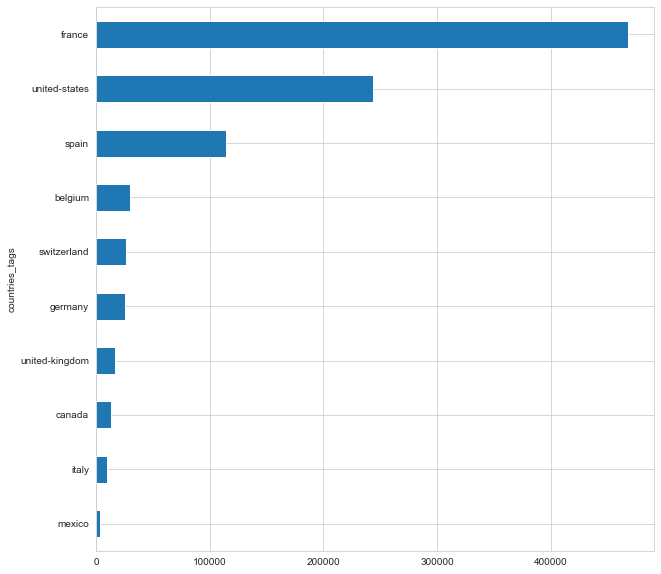

In [19]:
# De quel pays ces produits ont-ils étaient enregistré ?

count_countries = df.groupby('countries_tags').count()['product_name'].sort_values(ascending=False)

count_countries = count_countries.head(10).sort_values()

count_countries.plot(kind='barh', figsize=(10,10))

### Variable catégorielles

In [20]:
df.columns

Index(['product_name', 'brands_tags', 'main_category', 'ingredients_text',
       'labels_tags', 'countries_tags', 'energy_100g', 'fat_100g',
       'proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g',
       'sodium_100g', 'sugars_100g', 'saturated-fat_100g', 'grade'],
      dtype='object')

In [21]:
for x in df.iloc[:, :6].columns:
    h = df[x].value_counts()
    display(h)
    print('\n')

Ice cream                                                677
Chocolat                                                 431
Cookies                                                  379
Mayonnaise                                               375
Spaghetti                                                324
                                                        ... 
Buho                                                       1
Naturalee, Granola Cereal, Honey-Nut                       1
Chips de Crevette Thai au piment, gingembre et citron      1
Koskenlaskija                                              1
Farine de blé fluide l' originale                          1
Name: product_name, Length: 716440, dtype: int64

carrefour                      9056
auchan                         8967
u                              4516
casino                         3695
leader-price                   3603
                               ... 
celine-albisser                   1
molinos-valle-del-cibao-s-a       1
solvetia                          1
naturgut,penny,natur-gut          1
trendy-food                       1
Name: brands_tags, Length: 76723, dtype: int64

en:snacks                                  28791
en:biscuits                                11629
en:cheeses                                 11589
en:sauces                                  11291
en:confectioneries                          9415
                                           ...  
ar:eau-de-table                                1
fr:pate-de-foie-de-volaille-en-conserve        1
it:dark-chcolate-flavoured-drink-mix           1
fr:asiatiques                                  1
fr:kit-pour-enchiladas                         1
Name: main_category, Length: 18017, dtype: int64

Almonds.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             271
Semolina (wheat), durum flour (wheat), niacin, ferrous sulfate (iron), thiamin mononitrate, riboflavin, folic acid.                                                                                                                                                                                                                                                                                                                                                                                  270
Pasteurized milk, chee

en:organic                                                                                                                                                                                                                    26733
en:gluten-free                                                                                                                                                                                                                17815
en:made-in-france                                                                                                                                                                                                              7840
en:green-dot                                                                                                                                                                                                                   6478
en:no-preservatives                                                                     

france            467740
united-states     243326
spain             114103
belgium            29361
switzerland        25909
                   ...  
grenada                1
yugoslavia             1
ethiopia               1
somalia                1
cayman-islands         1
Name: countries_tags, Length: 211, dtype: int64

## Analyse bivariée

In [22]:
df.columns

Index(['product_name', 'brands_tags', 'main_category', 'ingredients_text',
       'labels_tags', 'countries_tags', 'energy_100g', 'fat_100g',
       'proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g',
       'sodium_100g', 'sugars_100g', 'saturated-fat_100g', 'grade'],
      dtype='object')

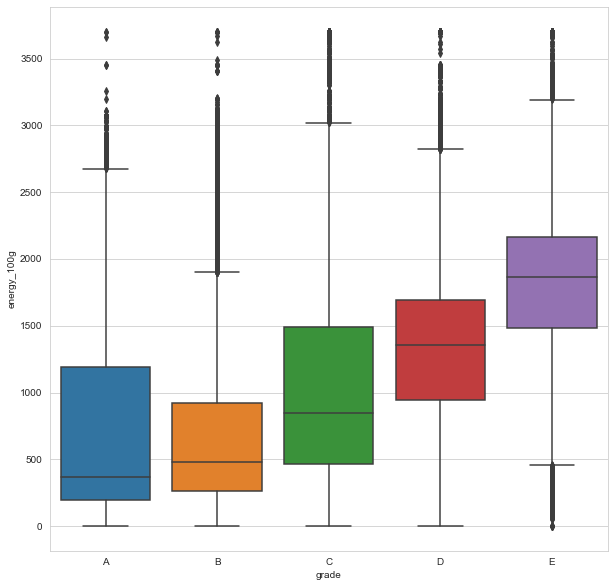

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax = sns.boxplot(data=df, x='grade', y='energy_100g')


In [24]:
df[df.grade == 'A'].sort_values('energy_100g', ascending=False)

,product_name,brands_tags,main_category,ingredients_text,labels_tags,countries_tags,energy_100g,fat_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,sodium_100g,sugars_100g,saturated-fat_100g,grade
896897,Huile de noix,huilerie-d-auron,en:walnut-oils,Noix 100%,fr:fabrication-artisanale,france,3700.000000,100.000000,0.0,0.0,-4.0,0.0,0.0,9.300000,A
336958,Huile vierge de Colza,NaN,en:rapeseed-oils,NaN,NaN,france,3700.000000,100.000000,0.0,0.0,-5.0,0.0,0.0,7.000000,A
943822,Huile de colza,fontaine-a-huile,en:rapeseed-oils,NaN,NaN,france,3663.000000,99.000000,0.0,0.0,-4.0,0.0,0.0,7.200000,A
250218,Greek Olive Oil,"365-everyday-value,whole-foods-market-inc",en:vegetable-oils,Extra virgin olive oil.,NaN,united-states,3453.333333,93.333333,0.0,0.0,-4.0,0.0,0.0,13.333333,A
320975,Everyday extra virgin oil olive,NaN,en:vegetable-oils,Extra virgin olive oil,NaN,united-states,3453.333333,93.333333,0.0,0.0,-4.0,0.0,0.0,13.333333,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384162,Winston,minute-maid,en:pineapple-nectars,NaN,NaN,spain,0.000000,0.000000,0.0,0.0,-10.0,0.0,0.0,0.000000,A
877707,carottes landes Gascogne,la-madrague,fr:bebe,carottes,fr:sans-residus-pesticides,france,0.000000,0.000000,0.0,0.0,-5.0,0.0,0.0,0.000000,A
878336,Pomme,NaN,en:fresh-apples,NaN,NaN,france,0.000000,0.000000,0.0,0.0,-5.0,0.0,0.0,0.000000,A
473208,Fraises,NaN,en:fresh-strawberries,NaN,NaN,france,0.000000,0.000000,0.0,0.0,-5.0,0.0,0.0,0.000000,A


<AxesSubplot:xlabel='grade', ylabel='sugars_100g'>

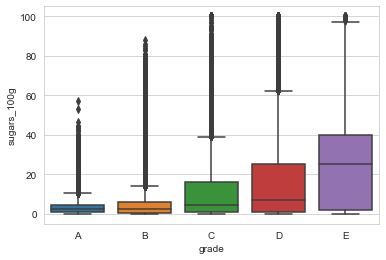

In [25]:
sns.boxplot(data=df, x='grade', y='sugars_100g')

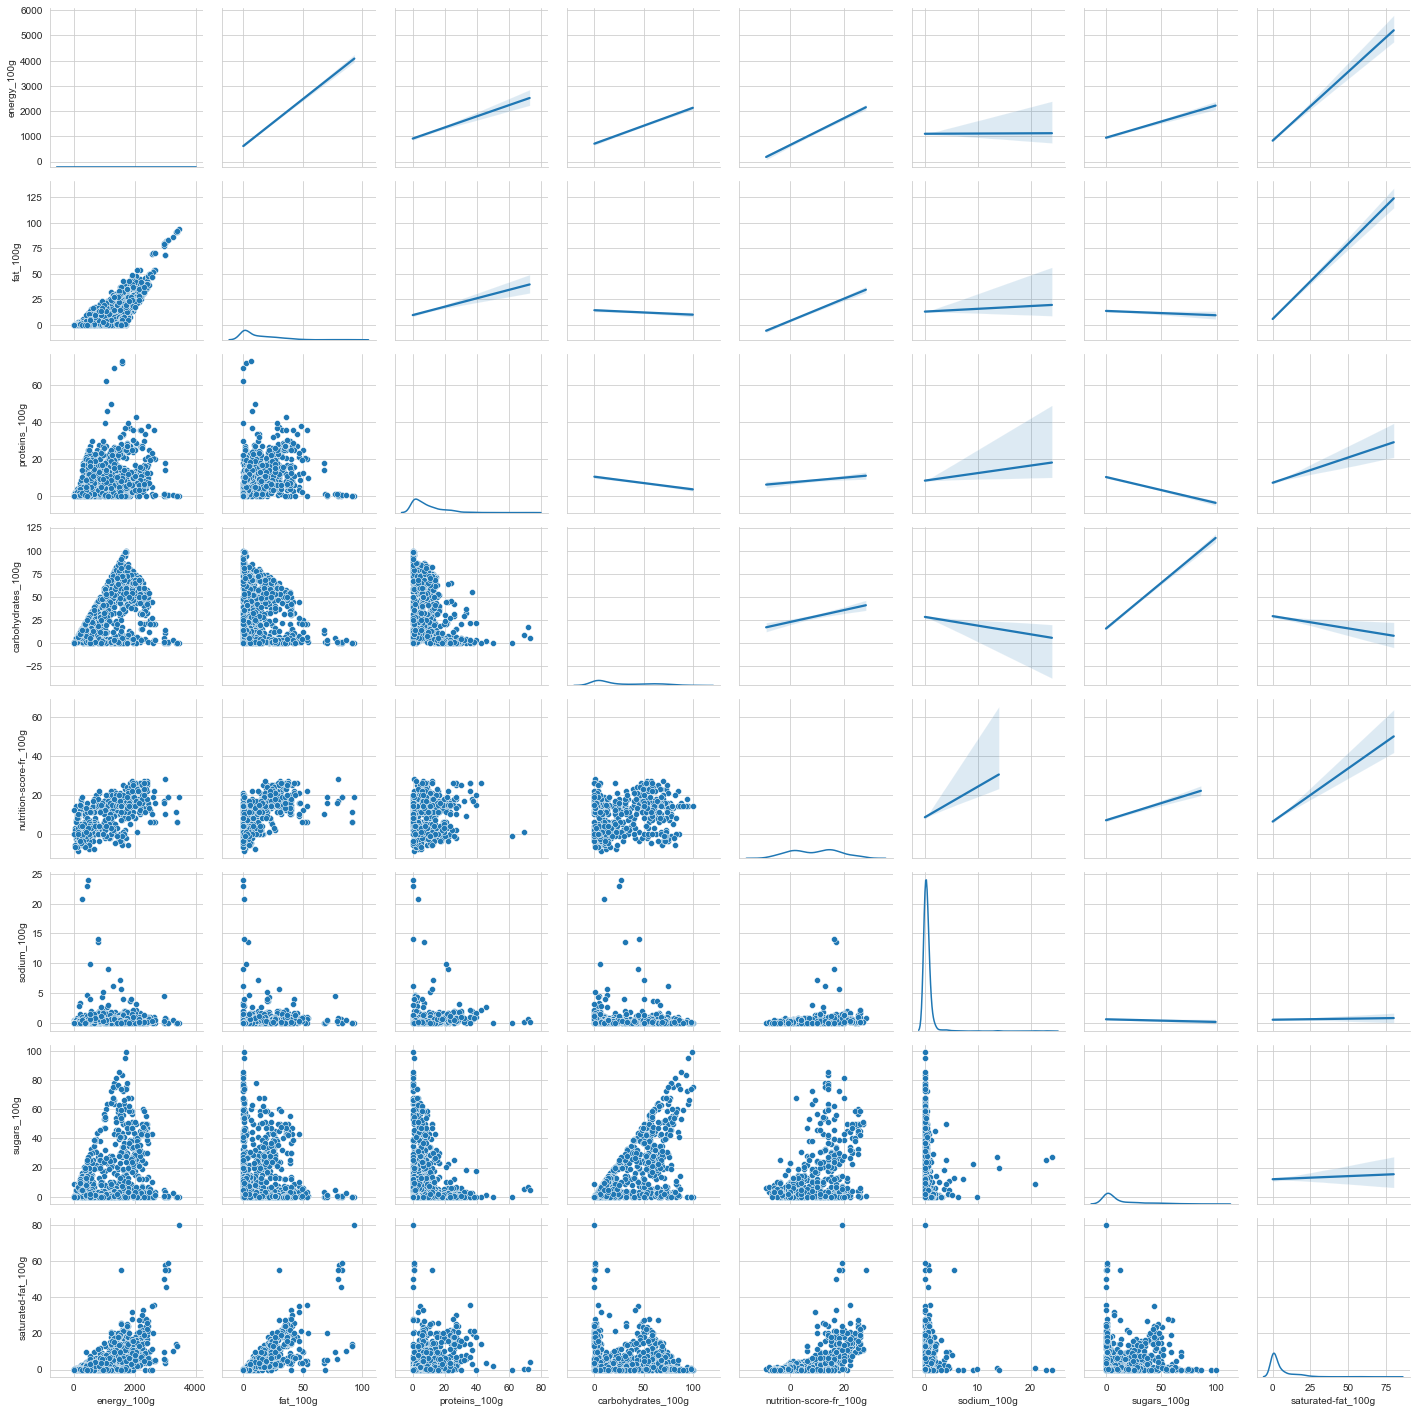

In [26]:
sample = df.sample(n=1000, random_state=42)

g = sns.PairGrid(data=sample)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_upper(sns.regplot, scatter=False)

<AxesSubplot:>

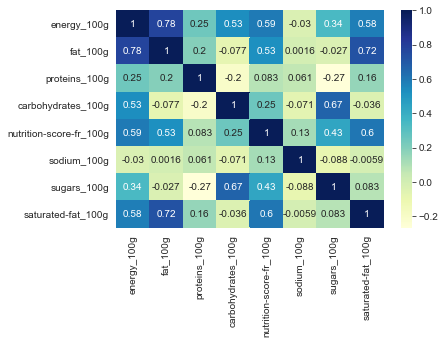

In [27]:
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

In [28]:
df

,product_name,brands_tags,main_category,ingredients_text,labels_tags,countries_tags,energy_100g,fat_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,sodium_100g,sugars_100g,saturated-fat_100g,grade
0,Vitória crackers,NaN,NaN,NaN,NaN,france,1583.3,7.0,7.8,70.1,NaN,0.560,15.0,3.08,NaN
3,moutarde au moût de raisin,courte-paille,en:mustards,eau graines de téguments de moutarde vinaigre ...,fr:delois-france,france,883.1,8.2,5.1,29.0,18.0,1.840,22.0,2.20,E
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,france,85.0,0.0,0.2,4.8,NaN,0.816,0.4,0.00,NaN
6,Mini coco,NaN,NaN,NaN,NaN,france,315.0,3.0,2.0,10.0,NaN,0.460,3.0,1.00,NaN
13,Salade de carottes râpées,NaN,en:seasoned-shredded-carrots,NaN,NaN,france,116.5,0.3,0.9,5.3,1.0,0.168,3.9,0.10,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555482,Minis beignets,NaN,en:sweet-fritters,NaN,NaN,france,1398.5,20.2,7.4,30.9,15.0,0.440,10.4,6.00,D
1555483,Erdbeerkuchen 1019g tiefgefroren,coppenrath-wiese,de:tiefkühl-kuchen,"SAHNE (33%), Erdbeeren (12%), Zucker, WEIZENHM...",en:made-in-germany,germany,920.4,7.6,2.6,35.0,12.0,0.112,24.0,4.80,D
1555484,Steak haché pur boeuf,NaN,en:ground-beef-steaks,NaN,NaN,france,550.5,5.0,21.5,0.0,-2.0,0.072,0.0,2.30,A
1555486,Scs,NaN,NaN,NaN,NaN,united-kingdom,495.0,12.0,1.0,2.0,NaN,0.400,1.0,1.00,NaN


In [29]:
df.columns = ['product_name', 'brands', 'categories', 'ingredients', 'labels',
       'countries', 'energy', 'fat', 'proteins',
       'carbohydrates', 'nutrition_score', 'sodium', 'sugar', 'saturated-fat_100g','grade']

## Clustering : K-means

In [30]:
df

,product_name,brands,categories,ingredients,labels,countries,energy,fat,proteins,carbohydrates,nutrition_score,sodium,sugar,saturated-fat_100g,grade
0,Vitória crackers,NaN,NaN,NaN,NaN,france,1583.3,7.0,7.8,70.1,NaN,0.560,15.0,3.08,NaN
3,moutarde au moût de raisin,courte-paille,en:mustards,eau graines de téguments de moutarde vinaigre ...,fr:delois-france,france,883.1,8.2,5.1,29.0,18.0,1.840,22.0,2.20,E
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,france,85.0,0.0,0.2,4.8,NaN,0.816,0.4,0.00,NaN
6,Mini coco,NaN,NaN,NaN,NaN,france,315.0,3.0,2.0,10.0,NaN,0.460,3.0,1.00,NaN
13,Salade de carottes râpées,NaN,en:seasoned-shredded-carrots,NaN,NaN,france,116.5,0.3,0.9,5.3,1.0,0.168,3.9,0.10,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555482,Minis beignets,NaN,en:sweet-fritters,NaN,NaN,france,1398.5,20.2,7.4,30.9,15.0,0.440,10.4,6.00,D
1555483,Erdbeerkuchen 1019g tiefgefroren,coppenrath-wiese,de:tiefkühl-kuchen,"SAHNE (33%), Erdbeeren (12%), Zucker, WEIZENHM...",en:made-in-germany,germany,920.4,7.6,2.6,35.0,12.0,0.112,24.0,4.80,D
1555484,Steak haché pur boeuf,NaN,en:ground-beef-steaks,NaN,NaN,france,550.5,5.0,21.5,0.0,-2.0,0.072,0.0,2.30,A
1555486,Scs,NaN,NaN,NaN,NaN,united-kingdom,495.0,12.0,1.0,2.0,NaN,0.400,1.0,1.00,NaN


In [31]:
Xk = X_log

In [32]:
# import
from sklearn import metrics
from sklearn.cluster import KMeans

In [33]:
scaler = StandardScaler()

In [34]:
Xk_scale = scaler.fit_transform(Xk)

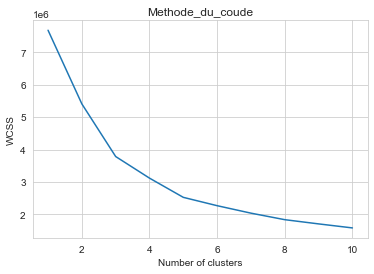

Wall time: 2min 41s


In [35]:
%%time

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Xk) # utilisation des variables non scales
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Methode_du_coude')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=500, n_init=10, random_state=42)

In [37]:
pred = kmeans.fit_predict(Xk_scale) 

In [38]:
df['pred_kmeans'] = pred

In [39]:
df.groupby(['pred_kmeans', 'grade'])['product_name'].count()

pred_kmeans  grade
0            A         55378
             B         78407
             C         55665
             D         31117
             E          7064
1            A          7732
             B         32702
             C         60997
             D         81971
             E        110153
Name: product_name, dtype: int64

## Analyse multivariée : PCA

In [40]:
n_comp = 4
pca = PCA(n_components = n_comp)


In [41]:
pl = Pipeline([
    ('scaler', scaler),
    ('pca', pca)
])

In [42]:
pl.fit_transform(Xk)

array([[-0.0085792 , -1.11303283,  0.87267441, -0.2772647 ],
       [ 0.31626894, -0.49340478,  2.09037629,  0.72213551],
       [-1.50891921,  2.13804737,  0.53491909,  0.97666281],
       ...,
       [ 1.11260464,  1.84367228, -1.25955597, -0.91592754],
       [-0.02119808,  1.23994189, -0.56422567,  1.04485893],
       [-1.27486951,  1.99996836, -0.37960221,  0.17579263]])

In [43]:
pl[1].explained_variance_ratio_

array([0.39372227, 0.29553639, 0.14134453, 0.10591003])

In [44]:
pl[1].components_

array([[ 0.55112762,  0.4780106 , -0.22568001,  0.29453033, -0.25606478,
         0.51431067],
       [-0.31483966, -0.01468143, -0.58950726,  0.22595671, -0.61883162,
        -0.34515594],
       [-0.13759104,  0.14323793,  0.36829395,  0.86169284,  0.16240786,
        -0.2366861 ],
       [ 0.17165709, -0.81009668, -0.27384665,  0.34153555,  0.13792492,
         0.32189349]])

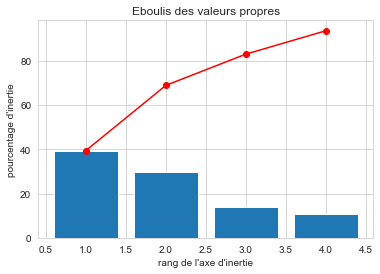

In [45]:
# Eboulis des valeurs propres
display_scree_plot(pl[1])

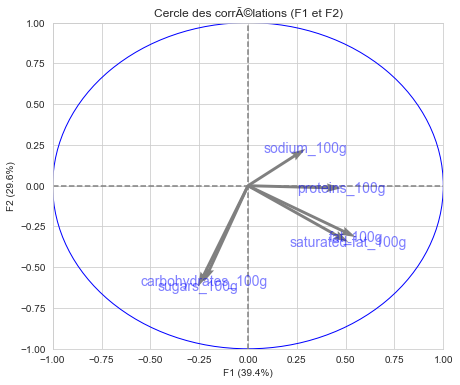

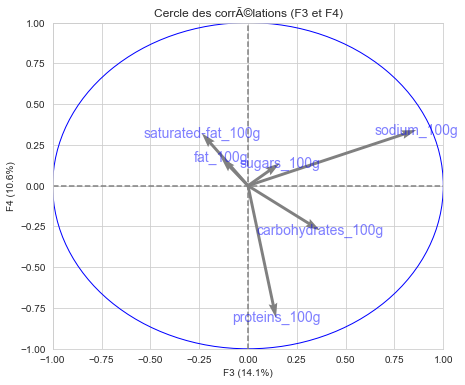

In [46]:
features = Xk.columns # Extraction des noms de variables
names = Xk.index # Extraction des noms de pays

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

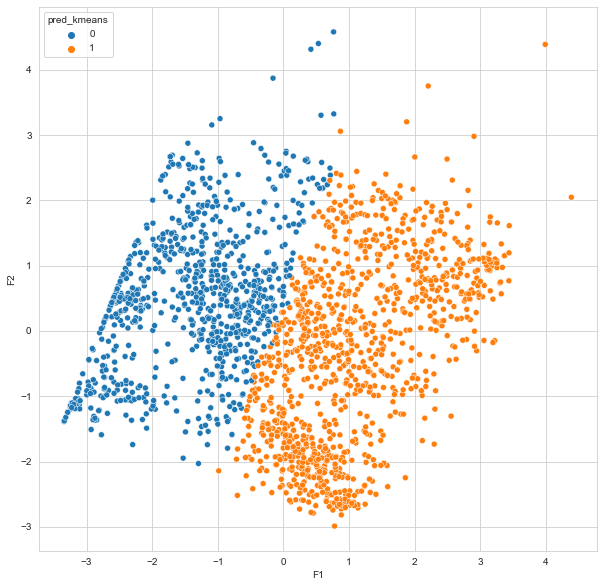

In [47]:
df[['F1', 'F2']] = pl.fit_transform(Xk)[:, 0:2]
sample_pca = df.sample(n= 2000)
fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax = sns.scatterplot(data=sample_pca, x='F1', y='F2', hue='pred_kmeans')

In [48]:
sample_pca

,product_name,brands,categories,ingredients,labels,countries,energy,fat,proteins,carbohydrates,nutrition_score,sodium,sugar,saturated-fat_100g,grade,pred_kmeans,F1,F2
1441800,Hamburgueses de llenties amb verdures,ametller-origen,NaN,NaN,NaN,spain,560.900000,7.90,7.90,7.90,NaN,0.560,2.0,1.40,NaN,1,0.435905,0.674040
613713,Knacki,herta,en:french-sausages,"Viande de porc, eau, gras de porc, lactoserum ...",NaN,belgium,1106.000000,23.00,13.00,2.00,17.0,0.720,2.0,9.00,E,1,2.012602,0.482451
480718,Pizza crackers,italiamo,NaN,NaN,NaN,france,1703.700000,8.60,12.10,69.40,NaN,1.120,5.1,1.40,NaN,1,0.426914,-0.356235
1359791,Grosellas rojas,NaN,NaN,NaN,NaN,spain,210.900000,0.60,0.90,10.20,NaN,0.400,0.0,0.04,NaN,0,-1.330107,1.720124
1320428,Dolcezza di peperoncini,NaN,NaN,NaN,NaN,belgium,832.800000,0.50,0.90,47.00,NaN,1.280,45.0,0.00,NaN,0,-1.940893,-0.310218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654808,Chair à saucisse Jean Rozé,jean-roze,en:sausage-meat-raw,"viande de porc [origine : Francel 89%, eau, ac...",NaN,france,1218.700000,26.00,14.00,1.10,18.0,0.620,0.8,10.00,E,1,2.246438,0.768414
566943,Chèvre et figue,NaN,NaN,NaN,NaN,switzerland,672.700000,14.00,4.80,4.30,NaN,0.296,3.9,3.60,NaN,1,0.614896,0.222430
1151392,Freezy lolly pops,NaN,NaN,NaN,NaN,belgium,258.399997,0.00,0.00,15.20,NaN,0.000,15.2,0.00,NaN,0,-2.702742,0.221381
712594,Composition gourmande de Surimi et crabe,bourgain-et-fils,en:salted-spreads,NaN,NaN,france,1033.800000,21.60,6.70,7.10,11.0,0.600,1.0,2.10,C,1,0.998999,0.608004


In [49]:
df.grade.value_counts()

E    117217
C    116662
D    113088
B    111109
A     63110
Name: grade, dtype: int64

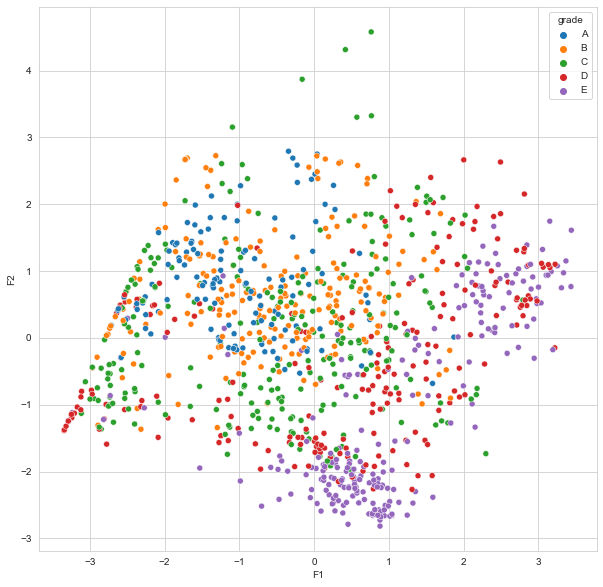

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax = sns.scatterplot(data=sample_pca, x='F1', y='F2', hue='grade')

In [51]:
num_var = df.describe().columns

In [52]:
for x in num_var :
    print(x)
    display(df.groupby('pred_kmeans')[x].describe())

energy


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,647.501088,553.238253,0.0,195.8,410.2,1155.9,3547.3
1,555786.0,1506.392681,641.831644,0.0,961.6,1533.7,1991.3,3700.0


fat


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,1.693968,2.833356,0.0,0.000000,0.61,2.4,95.0
1,555786.0,22.275874,15.588529,0.0,10.769231,19.00,30.0,100.0


proteins


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,4.402678,6.534465,0.0,0.4,2.07,6.3,100.0
1,555786.0,12.129157,10.336035,0.0,5.4,9.00,17.0,100.0


carbohydrates


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,29.998750,30.354764,0.0,5.69,14.0,58.0,100.0
1,555786.0,27.999393,25.297018,0.0,2.90,22.0,52.5,100.0


nutrition_score


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,227631.0,3.478076,6.773365,-15.0,-1.0,2.0,8.0,36.0
1,293555.0,13.606196,7.721841,-15.0,9.0,14.0,19.0,40.0


sodium


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,0.354959,1.788748,0.0,0.004,0.048,0.32,64.0
1,555786.0,0.635486,1.837886,0.0,0.120,0.393,0.68,100.0


sugar


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,14.439210,21.903249,0.0,1.0,4.70,14.00,100.0
1,555786.0,12.611303,16.729654,0.0,0.6,3.33,22.64,100.0


saturated-fat_100g


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,0.401563,0.744837,0.0,0.00,0.1,0.5,70.0
1,555786.0,8.529251,8.006483,0.0,2.82,6.0,12.2,100.0


pred_kmeans


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,555786.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


F1


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,-1.395020,0.924377,-3.343740,-2.177773,-1.307172,-0.707022,1.586422
1,555786.0,1.073482,0.934216,-1.185205,0.383141,0.905492,1.654050,5.844708


F2


,count,mean,std,min,25%,50%,75%,max
pred_kmeans,,,,,,,,
0,427683.0,0.503201,1.133110,-2.514035,-0.224331,0.478053,1.178118,5.208863
1,555786.0,-0.387218,1.343482,-3.039296,-1.607856,-0.268269,0.679637,5.483319


Interprétation des groupes :
- groupe 2 = aliment riche en calorie et riche en lipide
- groupe 1 = aliment faible en calorie
- groupe 1 = aliment avec un apport calorie modérée et faible en lipide

In [53]:
for x in num_var :
    print(x)
    display(df.groupby('grade')[x].describe())

energy


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,658.357695,616.952453,0.0,198.90,364.310000,1190.0000,3700.0
B,111109.0,655.266404,554.737407,0.0,262.28,479.910000,918.7000,3700.0
C,116662.0,1013.067601,749.220688,0.0,464.87,848.160000,1488.1325,3700.0
D,113088.0,1332.457244,584.972358,0.0,943.50,1358.649993,1695.5900,3700.0
E,117217.0,1809.468889,516.804910,0.0,1482.09,1861.700000,2166.4300,3700.0


fat


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,3.283362,8.618049,0.0,0.00,0.91,2.6875,100.0
B,111109.0,5.262807,9.118176,0.0,0.80,2.64,6.1000,100.0
C,116662.0,11.549942,17.261611,0.0,0.50,6.12,14.0000,100.0
D,113088.0,16.154862,14.394642,0.0,3.45,13.82,25.0000,100.0
E,117217.0,27.240474,15.163920,0.0,18.50,25.00,33.9000,100.0


proteins


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,7.900582,7.742490,0.0,1.50,6.00,12.28,100.00
B,111109.0,7.535455,7.873440,0.0,2.20,5.30,10.59,100.00
C,116662.0,7.198534,8.193991,0.0,0.70,4.65,10.71,95.00
D,113088.0,9.801217,9.685201,0.0,2.38,6.90,15.93,90.00
E,117217.0,9.205159,8.730972,0.0,3.85,6.60,11.90,90.91


carbohydrates


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,23.680200,25.923477,0.0,4.56,12.00,41.00,100.0
B,111109.0,19.555283,22.543080,0.0,4.40,11.00,24.36,100.0
C,116662.0,27.255569,25.563758,0.0,5.83,18.00,48.00,100.0
D,113088.0,33.418038,30.195138,0.0,3.80,25.89,60.00,100.0
E,117217.0,37.946098,26.693237,0.0,5.43,46.51,60.00,100.0


nutrition_score


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,-4.209396,1.995105,-15.0,-5.0,-4.0,-3.0,-2.0
B,111109.0,1.019251,1.389262,-1.0,0.0,1.0,2.0,3.0
C,116662.0,7.534107,2.553996,4.0,5.0,7.0,10.0,11.0
D,113088.0,13.960951,1.365249,12.0,13.0,14.0,15.0,16.0
E,117217.0,21.161879,3.224132,17.0,18.0,21.0,24.0,40.0


sodium


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,0.105815,0.155195,0.0,0.004,0.040,0.200000,14.90
B,111109.0,0.228280,0.387278,0.0,0.040,0.200,0.387000,65.70
C,116662.0,0.574715,2.224186,0.0,0.032,0.304,0.560000,93.50
D,113088.0,0.611287,1.584977,0.0,0.064,0.400,0.708000,91.44
E,117217.0,0.606613,1.359494,0.0,0.104,0.360,0.799592,100.00


sugar


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,3.747822,4.405767,0.0,0.77,2.465,4.60,57.0
B,111109.0,4.948286,7.904132,0.0,0.56,2.600,5.97,88.0
C,116662.0,11.772517,16.126937,0.0,1.10,4.500,16.33,100.0
D,113088.0,17.512222,22.872211,0.0,0.80,6.900,25.45,100.0
E,117217.0,23.957952,20.831177,0.0,1.79,25.000,40.00,100.0


saturated-fat_100g


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,0.424967,0.894069,0.0,0.00,0.01,0.50,57.2
B,111109.0,1.143760,1.505377,0.0,0.00,0.60,1.79,66.0
C,116662.0,2.757631,4.374270,0.0,0.00,1.47,3.70,100.0
D,113088.0,6.006211,6.927595,0.0,0.42,3.63,7.90,100.0
E,117217.0,12.892840,9.263444,0.0,7.20,11.10,17.00,100.0


pred_kmeans


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,0.122516,0.327884,0.0,0.0,0.0,0.0,1.0
B,111109.0,0.294324,0.455740,0.0,0.0,0.0,1.0,1.0
C,116662.0,0.522852,0.499480,0.0,0.0,1.0,1.0,1.0
D,113088.0,0.724843,0.446596,0.0,0.0,1.0,1.0,1.0
E,117217.0,0.939736,0.237977,0.0,1.0,1.0,1.0,1.0


F1


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,-0.981466,0.925269,-3.021209,-1.631927,-1.047247,-0.436358,2.477848
B,111109.0,-0.544650,1.064300,-3.285014,-1.296282,-0.635058,0.216576,3.173942
C,116662.0,-0.323253,1.469345,-3.343740,-1.489401,-0.119724,0.808784,4.079968
D,113088.0,0.285663,1.802048,-3.343740,-0.745506,0.609775,1.621282,5.101741
E,117217.0,1.031022,1.244585,-3.343740,0.386074,0.886858,1.950507,5.329882


F2


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,63110.0,0.779000,0.830519,-1.878725,0.157116,0.719749,1.365553,2.877191
B,111109.0,0.661770,0.919274,-2.511440,0.038390,0.552896,1.201887,3.892084
C,116662.0,0.124456,1.121322,-2.714545,-0.783957,0.047988,0.823972,5.346920
D,113088.0,-0.272314,1.119442,-2.739958,-1.254749,-0.337442,0.565338,4.632438
E,117217.0,-1.101215,1.340351,-3.039296,-2.242314,-1.692206,0.131764,4.292693


## Analyse multivariée : ANOVA

In [54]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.compat import lzip
import scipy.stats as stats

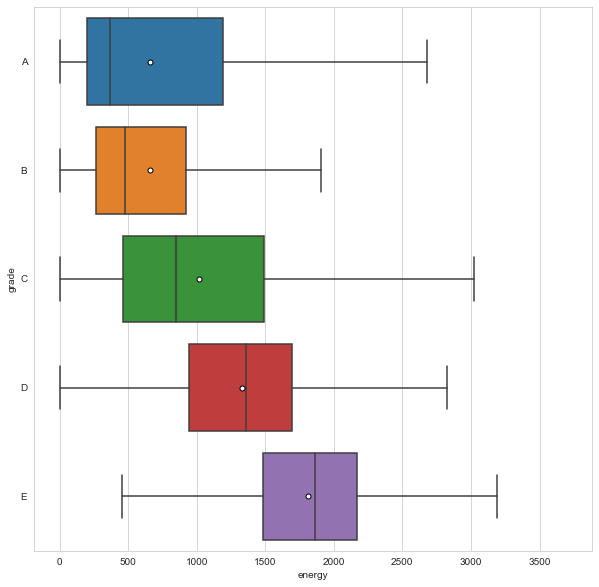

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches((10,10))

sns.boxplot(ax=ax, data=df, y='grade', x='energy', fliersize = 0, showmeans= True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.show()

<AxesSubplot:xlabel='energy', ylabel='Count'>

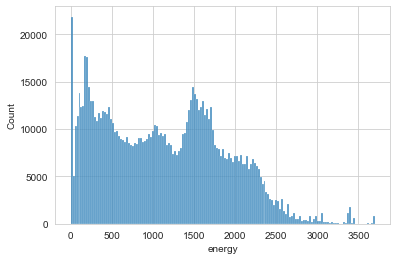

In [56]:
sns.histplot(data=df, x='energy')

In [57]:
reg_anova = smf.ols('energy ~ C(grade)', data= df).fit()

reg_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                 6.683e+04
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:04:08   Log-Likelihood:            -4.0818e+06
No. Observations:              521186   AIC:                         8.164e+06
Df Residuals:                  521181   BIC:                         8.164e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       658.3577      2.427    271.292      0.000     653.601     663.114
C(grade)[T.B]    -3.0913      3.039     -1.017      0.309      -9.047       2.865
C(grade)[T.C]   354.7099      3.012    117.748      0.000     348.806     360.614
C(grade)[T.D]   674.0995      3.029    222.540      0.000     668.163     680.037
C(grade)[T.E]  1151.1112      3.010    382.435      0.000    1145.212    1157.011
==============================================================================
Omnibus:                    56336.438   Durbin-Watson:                   0.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87830.512
Skew:                           0.793   Prob(JB):                         0.00
Kurtosis:                       4.236   Cond. No.                         7.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
aov_table = sm.stats.anova_lm(reg_anova, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(grade),9.934819e+10,4.0,66827.099321,0.0
Residual,1.937028e+11,521181.0,NaN,NaN


In [59]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(grade),9.934819e+10,4.0,2.483705e+10,66827.099321,0.0,0.339013,0.339008
Residual,1.937028e+11,521181.0,3.716613e+05,NaN,NaN,NaN,NaN


### Vérification des hypothèses

#### Normalité des résidus

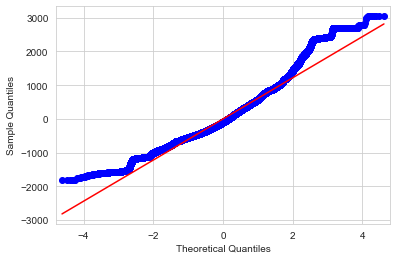

In [60]:
sm.qqplot(reg_anova.resid, line='s')
plt.savefig('qqplot')
plt.show()

In [61]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.stattools.jarque_bera(reg_anova.resid)
lzip(name, test)

[('Jarque-Bera', 87830.51196058834),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 0.7930911970900516),
 ('Kurtosis', 4.236331993248691)]

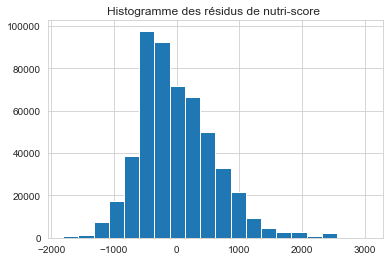

In [62]:
plt.hist(reg_anova.resid, bins=20)
plt.title('Histogramme des résidus de nutri-score ' )
plt.savefig('hist_anova')
plt.show()

#### Homoscédasticité

In [63]:
anova = df.copy()
anova['resid'] = reg_anova.resid

list_homo = []
for categorie in ['A', 'B', 'C', 'D', 'E'] :
    x = anova.resid[anova.grade == categorie ]
    list_homo.append(x)



In [64]:
display(stats.bartlett(*list_homo))


BartlettResult(statistic=19434.878866458286, pvalue=0.0)

In [65]:
stats.levene(*list_homo, center='median')

LeveneResult(statistic=3281.2269198370445, pvalue=0.0)

Rappel de l'hypothèse nulle : tous les inputs sont d'une même population avec des variances égales.

Ici le test d'homoscédascitié n'est pas respecté. Même en ayant retirer les valeurs qui avaient des distributions très différentes (grâce au boxplot). L'ANOVA est robuste aux observations qui ne respectent pas l'homoscédascité dans la mesure les différents groupes ont une taille similaire. Dans notre cas les observations par groupe varient de manière assez importante.

#### Les échantillons sont prélevés aléatoirement et indépendamment dans les populations

Les informations ont été saisis par des utilisateurs. Les utilisateurs peuvent renseigner plusieurs produits. Cependant vu le nombre important de produits dans la base de données, on peut supposer que les enregistrements sont indépendants les uns des autres.

## ANOVA KRUSKAL WALLIS

In [66]:
df

,product_name,brands,categories,ingredients,labels,countries,energy,fat,proteins,carbohydrates,nutrition_score,sodium,sugar,saturated-fat_100g,grade,pred_kmeans,F1,F2
0,Vitória crackers,NaN,NaN,NaN,NaN,france,1583.3,7.0,7.8,70.1,NaN,0.560,15.0,3.08,NaN,1,-0.008579,-1.113033
3,moutarde au moût de raisin,courte-paille,en:mustards,eau graines de téguments de moutarde vinaigre ...,fr:delois-france,france,883.1,8.2,5.1,29.0,18.0,1.840,22.0,2.20,E,1,0.316269,-0.493405
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,france,85.0,0.0,0.2,4.8,NaN,0.816,0.4,0.00,NaN,0,-1.508919,2.138047
6,Mini coco,NaN,NaN,NaN,NaN,france,315.0,3.0,2.0,10.0,NaN,0.460,3.0,1.00,NaN,0,-0.638038,0.680550
13,Salade de carottes râpées,NaN,en:seasoned-shredded-carrots,NaN,NaN,france,116.5,0.3,0.9,5.3,1.0,0.168,3.9,0.10,B,0,-1.743828,1.157752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555482,Minis beignets,NaN,en:sweet-fritters,NaN,NaN,france,1398.5,20.2,7.4,30.9,15.0,0.440,10.4,6.00,D,1,0.772690,-1.080318
1555483,Erdbeerkuchen 1019g tiefgefroren,coppenrath-wiese,de:tiefkühl-kuchen,"SAHNE (33%), Erdbeeren (12%), Zucker, WEIZENHM...",en:made-in-germany,germany,920.4,7.6,2.6,35.0,12.0,0.112,24.0,4.80,D,1,-0.469995,-1.358128
1555484,Steak haché pur boeuf,NaN,en:ground-beef-steaks,NaN,NaN,france,550.5,5.0,21.5,0.0,-2.0,0.072,0.0,2.30,A,1,1.112605,1.843672
1555486,Scs,NaN,NaN,NaN,NaN,united-kingdom,495.0,12.0,1.0,2.0,NaN,0.400,1.0,1.00,NaN,0,-0.021198,1.239942


In [67]:
df.grade.unique()

[NaN, 'E', 'B', 'D', 'A', 'C']
Categories (5, object): ['A' < 'B' < 'C' < 'D' < 'E']

In [68]:
df.grade.value_counts()

E    117217
C    116662
D    113088
B    111109
A     63110
Name: grade, dtype: int64

In [69]:
x_list = []

for cat in df.grade.unique():
    x = df[df.grade == cat]['energy']
    x_list.append(list(x))

In [70]:
stats.kruskal(*x_list)

KruskalResult(statistic=nan, pvalue=nan)

In [71]:
from scikit_posthocs import posthoc_dunn

In [72]:
posthoc_dunn(x_list)

,2,3,4,5,6
2,1.0,0.000000,0.0,0.000000,0.0
3,0.0,1.000000,0.0,0.000155,0.0
4,0.0,0.000000,1.0,0.000000,0.0
5,0.0,0.000155,0.0,1.000000,0.0
6,0.0,0.000000,0.0,0.000000,1.0


## Régression multiple

In [132]:
nona = df.dropna(subset=['nutrition_score'])
nona_num = nona[num_var].drop(['F1', 'F2', 'pred_kmeans'], axis = 1)

In [133]:
X = nona_num[['fat', 'proteins', 'carbohydrates', 'sodium', 'sugar', 'saturated-fat_100g']]
X = np.log(X+1)
y = nona_num['nutrition_score']

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [136]:
y_train

616073     15.0
750701     12.0
137894     14.0
626535     -9.0
471398     26.0
           ... 
425409      3.0
219600     14.0
962351     13.0
156044      2.0
1313992    13.0
Name: nutrition_score, Length: 390889, dtype: float64

In [137]:
import statsmodels.tools.tools as sma
import statsmodels.api as sm

In [138]:
X_train = sma.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

In [139]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        nutrition_score   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 1.774e+05
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:14:00   Log-Likelihood:            -1.1514e+06
No. Observations:              390889   AIC:                         2.303e+06
Df Residuals:                  390882   BIC:                         2.303e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6331      0.024   -150.546      0.000      -3.680      -3.586
fat                    0.1760      0.012     14.250      0.000       0.152       0.200
proteins              -1.3464      0.009   -149.396      0.000      -1.364      -1.329
carbohydrates          0.0415      0.008      5.292      0.000       0.026       0.057
sodium                10.3850      0.024    432.064      0.000      10.338      10.432
sugar                  2.7708      0.009    325.458      0.000       2.754       2.787
saturated-fat_100g     5.5024      0.015    374.276      0.000       5.474       5.531
==============================================================================
Omnibus:                    14919.350   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42855.158
Skew:                          -0.122   Prob(JB):                         0.00
Kurtosis:                       4.604   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
import sklearn.metrics as skmet

In [141]:
X_train

,const,fat,proteins,carbohydrates,sodium,sugar,saturated-fat_100g
616073,1.0,2.639057,2.890372,0.693147,0.891998,0.262364,1.609438
750701,1.0,2.772589,2.564949,1.648659,0.444686,0.693147,1.722767
137894,1.0,4.035302,2.971440,3.145014,0.405465,1.547563,2.129421
626535,1.0,0.405465,1.410987,1.223775,0.023717,0.916291,0.095310
471398,1.0,3.465736,2.014903,4.050044,0.113329,3.795489,3.135494
...,...,...,...,...,...,...,...
425409,1.0,1.791759,2.484907,3.555348,0.322083,1.609438,1.386294
219600,1.0,2.802148,2.727199,2.233235,0.605954,0.783902,1.519513
962351,1.0,2.442347,0.336472,2.442347,0.650240,1.887070,0.955511
156044,1.0,4.214643,2.662355,2.662355,0.000000,0.000000,2.233235


In [142]:
X_test = sma.add_constant(X_test)

In [143]:
pred = model.predict(X_test)

In [144]:
np.sqrt(skmet.mean_squared_error(pred, y_test))

4.597557612202215

In [145]:
df_test = pd.DataFrame({'pred':pred, 'test': y_test})

In [146]:
df_test['grade_pred'] = pd.cut(df_test['pred'], bins=[-16,-2, 3, 11, 16, 40], labels=['A', 'B', 'C', 'D', 'E'])
df_test['grade_test'] = pd.cut(df_test['test'], bins=[-16,-2, 3, 11, 16, 40], labels=['A', 'B', 'C', 'D', 'E'])

In [147]:
(df_test['grade_pred'] == df_test['grade_test']).sum() / len(df_test)

0.5121146304212684

In [148]:
df_test

,pred,test,grade_pred,grade_test
1038487,14.493040,16.0,D,D
1031283,10.674938,15.0,C,D
916440,18.086304,19.0,E,E
371879,-5.369079,0.0,A,B
830231,10.063516,1.0,C,B
...,...,...,...,...
184225,15.412787,20.0,D,E
814182,-1.603659,-1.0,B,B
834831,4.384779,10.0,C,C
96617,2.051051,-5.0,B,A
